In [1]:
import pandas as pd
import numpy as np
import shared
import json


In [2]:
ve_or_ju = "ju"

In [3]:
runs_df = pd.read_csv(f'data/runs_{ve_or_ju}.tsv', delimiter="\t")


In [4]:
country_counts = runs_df["team_country"].value_counts()
top_country_counts = country_counts[country_counts > 50]
top_countries = top_country_counts.keys().tolist()
display(top_countries)

with open(f"data/top_countries_{ve_or_ju}.json", 'w') as outfile:
    json.dump(top_countries, outfile)

['FIN',
 'SWE',
 'NOR',
 'RUS',
 'LAT',
 'EST',
 'SUI',
 'GBR',
 'LTU',
 'DEN',
 'GER',
 'FRA',
 'ESP',
 'CZE',
 'POL',
 'ITA',
 'USA',
 'UKR',
 'HUN']

In [5]:
runs_df["first_name"] = runs_df.name.str.split(" ", expand=True).iloc[:, 0]
fn_counts = runs_df["first_name"].value_counts()
top_fn_counts = fn_counts[fn_counts > 20]
top_first_names = top_fn_counts.keys().tolist()
display(top_first_names)

with open(f"data/top_first_names_{ve_or_ju}.json", 'w') as outfile:
    json.dump(top_first_names, outfile)

['mikko',
 'antti',
 'timo',
 'juha',
 'matti',
 'jukka',
 'pekka',
 'mika',
 'jari',
 'jussi',
 'janne',
 'ville',
 'hannu',
 'heikki',
 'kari',
 'markku',
 'petri',
 'sami',
 'tuomas',
 'teemu',
 'marko',
 'harri',
 'lauri',
 'markus',
 'ari',
 'pasi',
 'vesa',
 'olli',
 'jouni',
 'jaakko',
 'eero',
 'arto',
 'tero',
 'juho',
 'tommi',
 'kimmo',
 'jani',
 'jarmo',
 'seppo',
 'risto',
 'tomi',
 'ilkka',
 'esa',
 'jarkko',
 'kalle',
 'tuomo',
 'tapio',
 'jyrki',
 'johan',
 'anders',
 'jorma',
 'simo',
 'erkki',
 'erik',
 'toni',
 'juhani',
 'petteri',
 'jouko',
 'jonas',
 'mikael',
 'joonas',
 'henrik',
 'lasse',
 'pertti',
 'aleksi',
 'martin',
 'henri',
 'jan',
 'aki',
 'niko',
 'samuli',
 'andreas',
 'anssi',
 'juuso',
 'esko',
 'pauli',
 'matias',
 'fredrik',
 'paavo',
 'miika',
 'joni',
 'peter',
 'riku',
 'niklas',
 'anton',
 'tapani',
 'reijo',
 'daniel',
 'martti',
 'kai',
 'jarno',
 'raimo',
 'panu',
 'stefan',
 'thomas',
 'keijo',
 'magnus',
 'per',
 'simon',
 'sakari',
 'pen

In [6]:
# Temporarily remove 2018 in order to try predict it in other notebook
runs_df = runs_df[runs_df.year != 2018]
runs_df

,name,year,team_id,team,team_country,pace,leg_nro,num_runs,first_name
1,joni hirvikallio,2017,16,KOOVEE,FIN,5.762,1,6,joni
2,joni hirvikallio,2016,143,KOOVEE,FIN,6.251,6,6,joni
3,joni hirvikallio,2015,12,KOOVEE,FIN,5.843,5,6,joni
4,joni hirvikallio,2013,37,KOOVEE,FIN,5.796,1,6,joni
6,topi anjala,2017,1,KOOVEE,FIN,5.621,1,7,topi
7,topi anjala,2016,9,KOOVEE,FIN,6.100,1,7,topi
8,topi anjala,2015,12,KOOVEE,FIN,5.977,1,7,topi
9,topi anjala,2014,21,KOOVEE,FIN,7.164,2,7,topi
10,topi anjala,2013,37,KOOVEE,FIN,5.642,7,7,topi
11,topi anjala,2012,48,KOOVEE,FIN,5.974,3,7,topi


In [7]:
features = shared.preprocess_features(runs_df, top_countries, top_first_names)
features.head(10)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 64184 entries, 1 to 76530
Data columns (total 9 columns):
name            64184 non-null object
year            64184 non-null int64
team_id         64184 non-null int64
team            64184 non-null object
team_country    63349 non-null object
pace            64184 non-null float64
leg_nro         64184 non-null int64
num_runs        64184 non-null int64
first_name      64184 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 4.9+ MB


None

,team_id,team_id_log10,leg_1,leg_2,leg_3,leg_4,leg_5,leg_6,leg_7,c_CZE,...,fn_viktor,fn_vili,fn_ville,fn_visa,fn_vladimir,fn_väinö,fn_william,fn_yrjö,fn_öystein,fn_öyvind
1,16,1.204120,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,143,2.155336,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,1.079181,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,1.568202,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0.954243,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,12,1.079181,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,21,1.322219,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,37,1.568202,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11,48,1.681241,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
features.info()

<class 'pandas.core.sparse.frame.SparseDataFrame'>
Int64Index: 64184 entries, 1 to 76530
Columns: 490 entries, team_id to fn_öyvind
dtypes: Sparse[float64, nan](1), Sparse[int64, nan](1), Sparse[uint8, 0](488)
memory usage: 5.2 MB


In [9]:
x = features.values
#x = features[["team_id", "team_id_log10", "team_id_log100", "team_id_log2", "team_id_square", "leg_id_1", "leg_id_2", "leg_id_3", "leg_id_4", "leg_id_5", "leg_id_6", "leg_id_7"]].values # Poista tää.
y = np.log(runs_df.pace.values)
y = y.reshape(len(y), 1)

display(x.shape)
display(y.shape)

(64184, 490)

(64184, 1)

In [10]:
import sklearn
from sklearn import linear_model
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2019)
x_train.shape

(51347, 490)

In [12]:
import matplotlib.pyplot as plt
def fit_and_test_model(model, x_train, x_test, y_train, y_test, fit_params={}):
    model.fit(x_train, y_train.ravel(), **fit_params)
    y_pred = np.exp(model.predict(x_test))
    print(f"Shapes: y_test={np.exp(y_test).shape} y_pred={y_pred.shape}")
    print("Mean squared error: %.3f" % mean_squared_error(np.exp(y_test), y_pred))
    print('Explained variance score: %.3f' % r2_score(np.exp(y_test), y_pred))
    
    plt.scatter(x_test[:,0], np.exp(y_test),  color='red', alpha=0.01)
    plt.scatter(x_test[:,0], y_pred, color='blue', alpha=0.01)
    plt.ylim(4, 20)
    plt.show()

In [13]:
y_train.shape

(51347, 1)

Shapes: y_test=(12837, 1) y_pred=(12837,)
Mean squared error: 5.370
Explained variance score: 0.388


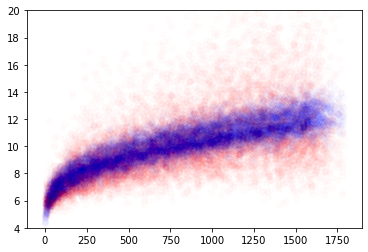

CPU times: user 7.3 s, sys: 701 ms, total: 8 s
Wall time: 2.84 s


In [14]:
%%time
linear = linear_model.LinearRegression()
fit_and_test_model(linear, x_train, x_test, y_train, y_test)

In [15]:
pd.DataFrame({'name':features.keys(), 'coef':linear.coef_})

,name,coef
0,team_id,1.037645e-04
1,team_id_log10,2.150290e-01
2,leg_1,1.203926e+08
3,leg_2,1.203926e+08
4,leg_3,1.203926e+08
5,leg_4,1.203926e+08
6,leg_5,1.203926e+08
7,leg_6,1.203926e+08
8,leg_7,1.203926e+08
9,c_CZE,1.258880e+08


      Iter       Train Loss   Remaining Time 
         1           0.0626          155.82m
         2           0.0581          156.69m
         3           0.0545          155.24m
         4           0.0515          155.09m
         5           0.0489          155.23m
         6           0.0469          154.89m
         7           0.0451          154.78m
         8           0.0437          154.53m
         9           0.0424          154.74m
        10           0.0414          154.30m
        20           0.0367          153.34m
        30           0.0354          150.26m
        40           0.0347          148.55m
        50           0.0344          145.96m
        60           0.0342          143.29m
        70           0.0341          140.96m
        80           0.0339          139.27m
        90           0.0338          137.45m
       100           0.0337          135.82m
       200           0.0332          126.88m
       300           0.0328          123.65m
       40

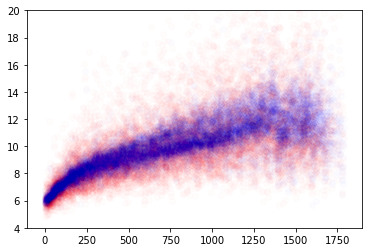

CPU times: user 2h 9min 3s, sys: 12.2 s, total: 2h 9min 15s
Wall time: 2h 28min 31s


In [16]:
%%time
gbr_num_estimators=7100
gbr = sklearn.ensemble.GradientBoostingRegressor(n_estimators=gbr_num_estimators, random_state=0, verbose=1)

fit_and_test_model(gbr, x_train, x_test, y_train, y_test)

#print(f"feature_importances_: {gbr.feature_importances_}")
#gbr_features = pd.DataFrame({'feature':first_names.columns, 'importance': gbr.feature_importances_})
#gbr_features['feature'] = gbr_features['feature'].str.replace('top_first_name_','')
#display(gbr_features.sort_values(by="importance", ascending=False))

In [17]:
gbr_num_estimators_quantile=int(gbr_num_estimators/2)

      Iter       Train Loss   Remaining Time 
         1           0.0567           73.51m
         2           0.0542           74.21m
         3           0.0522           73.90m
         4           0.0506           73.14m
         5           0.0490           73.21m
         6           0.0477           73.11m
         7           0.0466           73.39m
         8           0.0457           73.48m
         9           0.0449           73.70m
        10           0.0442           74.05m
        20           0.0412           73.61m
        30           0.0404           74.08m
        40           0.0400           73.85m
        50           0.0398           73.16m
        60           0.0397           72.25m
        70           0.0396           71.23m
        80           0.0396           70.65m
        90           0.0395           69.88m
       100           0.0395           69.27m
       200           0.0392           66.02m
       300           0.0390           62.87m
       40

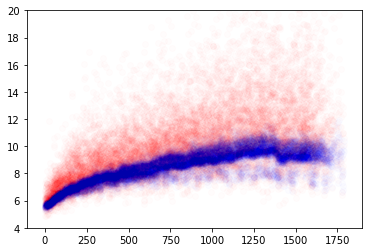

In [18]:
gbr_q_low = sklearn.ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.159, n_estimators=gbr_num_estimators_quantile, random_state=0, verbose=1)
fit_and_test_model(gbr_q_low, x_train, x_test, y_train, y_test)


      Iter       Train Loss   Remaining Time 
         1           0.0642           80.77m
         2           0.0622           80.40m
         3           0.0604           80.39m
         4           0.0589           80.50m
         5           0.0576           80.44m
         6           0.0564           80.56m
         7           0.0554           80.31m
         8           0.0545           80.27m
         9           0.0537           80.20m
        10           0.0530           79.95m
        20           0.0492           78.37m
        30           0.0478           76.89m
        40           0.0472           75.27m
        50           0.0469           74.33m
        60           0.0467           72.90m
        70           0.0466           71.66m
        80           0.0465           70.69m
        90           0.0464           69.89m
       100           0.0463           69.08m
       200           0.0459           64.22m
       300           0.0456           61.21m
       40

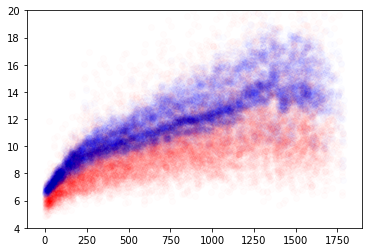

In [19]:
gbr_q_high = sklearn.ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.841, n_estimators=gbr_num_estimators_quantile, random_state=0, verbose=1)
fit_and_test_model(gbr_q_high, x_train, x_test, y_train, y_test)



In [20]:
joblib.dump(gbr, 'gbr.sav')
joblib.dump(gbr_q_low, 'gbr_q_low.sav')
joblib.dump(gbr_q_high, 'gbr_q_high.sav')


['gbr_q_high.sav']

In [21]:
gbr_preds = gbr.predict(pd.DataFrame(x_test))
gbr_q_low_preds = gbr_q_low.predict(pd.DataFrame(x_test))
gbr_q_high_preds = gbr_q_high.predict(pd.DataFrame(x_test))

In [22]:
gbr_q_pred_errors = pd.DataFrame({
    'q_low':np.exp(gbr_q_low_preds),
    'true':np.exp(y_test).ravel(), 
    'predicted':np.exp(gbr_preds), 
    'q_high':np.exp(gbr_q_high_preds), 
})

gbr_q_pred_errors["q_low_error"] = gbr_q_pred_errors.true < gbr_q_pred_errors.q_low
gbr_q_pred_errors["q_high_error"] = gbr_q_pred_errors.true > gbr_q_pred_errors.q_high
gbr_q_pred_errors["q_error"] = np.logical_or(gbr_q_pred_errors.q_low_error, gbr_q_pred_errors.q_high_error)

# Intentionally don't use log scale for calculation to get bigger std 
gbr_q_pred_errors["std"] = (gbr_q_pred_errors.q_high - gbr_q_pred_errors.q_low) / 2
gbr_q_pred_errors["std_correct"] = np.exp((gbr_q_high_preds - gbr_q_low_preds) / 2)
gbr_q_pred_errors["abs_error"] = np.abs(gbr_q_pred_errors.predicted - gbr_q_pred_errors.true)
gbr_q_pred_errors["abs_error_in_stds"] = gbr_q_pred_errors.abs_error / np.exp(gbr_q_pred_errors["std_correct"])

display(gbr_q_pred_errors.tail(15).round(3))
display(gbr_q_pred_errors.q_low_error.mean())
display(gbr_q_pred_errors.q_high_error.mean())
display(gbr_q_pred_errors.q_error.mean())
display(gbr_q_pred_errors["std"].mean())
display(gbr_q_pred_errors["std_correct"].mean())
display(gbr_q_pred_errors["abs_error_in_stds"].mean())

,q_low,true,predicted,q_high,q_low_error,q_high_error,q_error,std,std_correct,abs_error,abs_error_in_stds
12822,8.975,9.839,9.695,11.620,False,False,False,1.323,1.138,0.144,0.046
12823,8.513,9.587,9.907,11.154,False,False,False,1.320,1.145,0.320,0.102
12824,6.721,6.736,7.974,8.936,False,False,False,1.107,1.153,1.238,0.391
12825,8.819,8.877,10.368,12.465,False,False,False,1.823,1.189,1.491,0.454
12826,8.960,9.270,10.654,12.786,False,False,False,1.913,1.195,1.384,0.419
12827,8.636,18.745,12.806,15.857,False,True,True,3.611,1.355,5.939,1.532
12828,7.218,7.286,7.679,9.508,False,False,False,1.145,1.148,0.393,0.125
12829,9.148,9.101,9.252,12.878,True,False,True,1.865,1.187,0.151,0.046
12830,8.605,11.466,10.587,12.134,False,False,False,1.764,1.187,0.879,0.268
12831,7.453,9.353,8.826,9.647,False,False,False,1.097,1.138,0.527,0.169


0.16491392069798239

0.16273272571473085

0.32764664641271324

1.7892433628867013

1.1855509013565642

0.460538976376299

In [23]:
np.exp(1.138)

3.1205210778255728

In [24]:
%%date

UsageError: Cell magic `%%date` not found.


In [ ]:
STOP_HERE

In [ ]:
import os
#os.environ['MKL_THREADING_LAYER'] = 'GNU'
os.environ['THEANO_FLAGS'] = 'device=cpu'
#os.environ['THEANO_FLAGS'] = 'device=cuda,floatX=float32,force_device=True'

import pymc3 as pm
import pmlearn
from pmlearn.linear_model import LinearRegression
print('Running on pymc-learn v{}'.format(pmlearn.__version__))


In [ ]:
import multiprocessing
multiprocessing.cpu_count()

In [ ]:

pmlearn_linear = LinearRegression()
fit_params={
    "inference_type": "nuts",
    "inference_args": {
        "cores": multiprocessing.cpu_count() -1,
        #"chains":2,
        "init": 'adapt_diag',
        #"tune": 2000,
        "target_accept": 0.9999
    }
}
fit_and_test_model(pmlearn_linear, pd.DataFrame(data=x_train), pd.DataFrame(x_test), y_train, y_test,fit_params)

In [ ]:
pmlearn_preds = pmlearn_linear.predict(pd.DataFrame(x_test), return_std=True)

In [ ]:

joblib.dump(pmlearn_linear, 'pmlearn_linear.sav')

In [ ]:
pred_errors = pd.DataFrame({
    'mean':np.exp(pmlearn_preds[0]), 
    'std':np.exp(pmlearn_preds[1]), 
    'true':np.exp(y_test).ravel(), 
    'error':np.abs(np.exp(y_test).ravel() -np.exp(pmlearn_preds[0])) / np.exp(pmlearn_preds[1])
})
display(pred_errors.head(15))
pred_errors.error.mean()

In [ ]:
pmlearn_linear.plot_elbo()

In [ ]:
pm.traceplot(pmlearn_linear.trace)

In [ ]:
pm.forestplot(pmlearn_linear.trace, varnames=["betas", "alpha", "s"]);

In [ ]:
summary_df = pm.summary(pmlearn_linear.trace, varnames=["betas", "alpha", "s"])
summary_df

In [ ]:
pm.plot_posterior(pmlearn_linear.trace, varnames=["betas", "alpha", "s"],
                 figsize = [14, 8])

In [ ]:
pm.gelman_rubin(pmlearn_linear.trace, varnames=["betas", "alpha", "s"])